# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [ ]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  58418      0 --:--:-- --:--:-- --:--:-- 58517']

In [ ]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [ ]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #if len(array1) != len(array2):
     #   raise ValueError("The arrays must have the same dimension to calculate the dot product.")

    result = 0  # Initializes the result to 0
    for i in range(len(array1)):  # Iterates over array indices
        product = array1[i] * array2[i]  # Multiply the corresponding elements
        result += product  # Add the partial product to the result
    return result  # Returns the product


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))  # Sigmoid Calculation

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    # Verify that the vectors have the same dimension
    #if len(weight) != len(instance):
    #    raise ValueError("The dimensions of the weights and the instance do not match.")

    # Calculate dot product
    dot_prod = dot_product(weight, instance)

    # Apply the sigmoid function
    return sigmoid(dot_prod)

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.


def train_perceptron(instances, lr, epochs):

    # Initialization of weights (bias and other weights to 0)
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs): #Iterate over all epochs
        for instance in instances: #Iterate on each instance
            #TODO: name these steps
            in_value = dot_product(weights, instance) # Calculate model input using the dot product function
            output = sigmoid(in_value) # Obtain the output with the sigmoid function
            error = instance[-1] - output # Calculate error (difference between actual and predicted label)
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i] #Updating of weights

    return weights #Returning the adjusted weights after training

## Run it

In [ ]:
instances_tr = read_data("/content/train.dat")
instances_te = read_data("/content/test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

##Answer
The first implementation is used because the sigmoid activation function generates a continuous output, which allows the gradient to be calculated and the weights to be updated incrementally. This facilitates error propagation and efficient adjustment of the weights at each iteration. In contrast, `predict(weights, instance)` returns a binary ranking of 0 or 1 that is based on a threshold of 0.5, losing the probability information provided by the sigmoid and making it difficult to update the weights. In addition, calculating the error with a continuous function is key to a smoother fit and better training convergence.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

results = []

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            results.append((size, epochs, lr, accuracy))
            print(f"#tr: {size:3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In [ ]:
for size, epochs, lr, accuracy in results:
  if accuracy >= 80:
    print(f"#tr: {size:3}, epochs: {epochs:3}, learning rate: {lr:.3f}; Accuracy: {accuracy:.1f}")


#tr: 300, epochs: 100, learning rate: 0.010; Accuracy: 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy: 80.0
#tr: 400, epochs:  20, learning rate: 0.050; Accuracy: 80.0
#tr: 400, epochs:  50, learning rate: 0.050; Accuracy: 80.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy: 80.0


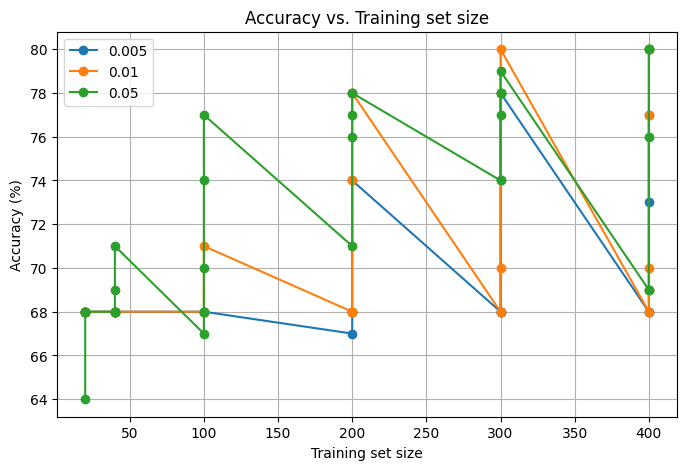

In [ ]:
import matplotlib.pyplot as plt
def plot_results(x_values, y_values, xlabel, ylabel, title, group_by, x_log=False):
    plt.figure(figsize=(8, 5))
    unique_groups = sorted(set(group_by))

    for group in unique_groups:
        subset = [(x, y) for x, y, g in zip(x_values, y_values, group_by) if g == group]
        subset.sort()
        plt.plot(*zip(*subset), marker='o', label=f'{group}')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if x_log:
        plt.xscale("log")
    plt.legend()
    plt.grid()
    plt.show()

# Extraer datos para los gráficos
train_sizes, epochs_list, lr_list, accuracy_list = zip(*results)

# Gráfico 1: Precisión vs. Tamaño del conjunto de entrenamiento
plot_results(train_sizes, accuracy_list, "Training set size",
             "Accuracy (%)", "Accuracy vs. Training set size", lr_list)

#A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?

Not always. As you can see in the graph above, using a tr of 300 and a tr of 400 you can get an accuracy of 80%. But it will also depend on the combination of hyperparameters that is established. In this case it can be seen that for a 300 tr, with 80% accuracy an lr of 0.01 was used, while for a 400 tr an lr of 0.05 was used.

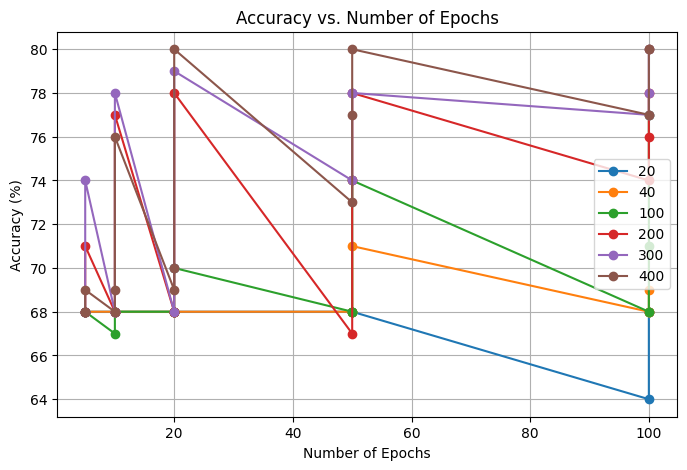

In [ ]:
# Graphic 2: Accuracy vs. Number of Epochs
plot_results(epochs_list, accuracy_list, "Number of Epochs",
             "Accuracy (%)", "Accuracy vs. Number of Epochs", train_sizes)

In this case, when buying with the number of epochs it can be seen that when training in 20 epochs, in 50 and in 100 it was possible to obtain the accuracy of 80%, in the same way, when changing some hyperparameters it is possible to reach these values, but in this example it can be seen how with 20, 50 and 100 epochs and 400 of tr also it is possible to reach the 80% of accuracy. Taking into account that the learning rates with which these points were reached are only 0.01 and 0.05.

# B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```


The second training run obtains a lower accuracy despite using more data due to the combination of hyperparameters. In the first run, the learning rate of 0.050 allows the model to adjust its weights faster, achieving an accuracy of 71.0% with only 100 training examples. In the second run, although 200 examples are used, the learning rate is lower (0.005) and makes the adjustments slower, which can lead to the model not fitting correctly in the 20 epochs set. As a result, the accuracy drops to 68.0%, despite having more data.

This suggests that the amount of data is not the only determining factor in improving model performance. If the learning rate is too low, the model may not take good advantage of the training set and become trapped in a local minimum. In addition, the number of epochs may not have been sufficient for the model with a reduced learning rate to achieve good performance.

#- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?


In [ ]:
tr_percent = [50, 75, 100]         # Probar con conjuntos más grandes
num_epochs = [20, 50, 100, 200, 300, 400, 500]        # Más épocas para mayor convergencia
lr_array = [0.05, 0.01, 0.005, 0.001, 0.0001]     # Aprendizaje adaptativo

# Almacenar resultados
results2 = []

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            results2.append((size, epochs, lr, accuracy))
            print(f"#tr: {size:3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 200, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 200, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs: 300, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 200, epochs: 400, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 200, epochs: 500, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 300, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 300, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 300, epochs: 300, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 300, epochs

In [ ]:
for size, epochs, lr, accuracy in results2:
  if accuracy >= 80:
    print(f"#tr: {size:3}, epochs: {epochs:3}, learning rate: {lr:.3f}; Accuracy: {accuracy:.1f}")

#tr: 400, epochs:  20, learning rate: 0.050; Accuracy: 80.0
#tr: 400, epochs:  50, learning rate: 0.050; Accuracy: 80.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy: 80.0
#tr: 400, epochs: 200, learning rate: 0.050; Accuracy: 80.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy: 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy: 80.0
#tr: 400, epochs: 200, learning rate: 0.010; Accuracy: 80.0
#tr: 400, epochs: 300, learning rate: 0.010; Accuracy: 80.0
#tr: 400, epochs: 400, learning rate: 0.010; Accuracy: 80.0
#tr: 400, epochs: 500, learning rate: 0.010; Accuracy: 80.0
#tr: 300, epochs: 200, learning rate: 0.005; Accuracy: 80.0
#tr: 300, epochs: 300, learning rate: 0.005; Accuracy: 80.0
#tr: 400, epochs: 200, learning rate: 0.005; Accuracy: 80.0
#tr: 400, epochs: 400, learning rate: 0.005; Accuracy: 80.0
#tr: 400, epochs: 500, learning rate: 0.005; Accuracy: 80.0


In this case, by modifying the hyperparameters it was not possible to reach a higher accuracy value of 80%. But it is possible to obtain an accuracy higher than 80.0% by adjusting by adding additional hyperparameters or by modifying the current ones in a better way. In the experiment conducted, the values of the learning rate, the number of epochs and the amount of training data may not have been ideal to achieve optimal performance. For example, a larger number of epochs could allow the model to better adjust its weights, especially when the learning rate is low. Also, an adaptive learning rate could help prevent the model from stalling at a local optimum or oscillating too much due to abrupt adjustments in weights.

Another possibility is to introduce techniques such as data normalization, optimized initialization of the weights, or even the use of a margin to improve the perceptron's ability to generalize to the test data. In addition, if the model fails to improve significantly, a more complex architecture, such as a multilayer perceptron or a different, more robust model, could be considered.

Or in any case, being only a perceptron, it may be necessary to add hidden layers due to its limited ability to learn.

#- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

Training for more epochs does not always guarantee better accuracy, as model performance depends on other factors such as learning rate, model capacity and data quality. In the early epochs, the model generally improves its accuracy rapidly as it learns key patterns in the data. However, after a certain point, the benefit of further training may diminish, resulting in overfitting, which generates high training accuracy but poor performance on test data. If the model keeps learning on noisy or irrelevant data in the later epochs, its generalization ability deteriorates.